# Ants

In [1]:
%matplotlib inline

In [7]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from IPython.display import HTML
import IPython

In [3]:
import pylab                                 
pylab.rcParams['figure.figsize'] = (10.0, 18.0)

In [4]:
%ls

ants.ipynb  one.mp4     two.mp4


In [66]:
from pathlib import Path

In [8]:
IPython.display.Video("./one.mp4", width=500)

In [44]:
src = cv2.VideoCapture('one.mp4')
print("movie status:", src.isOpened())

movie status: True


In [45]:
mov = []
try:
    for _ in range(0,100,20):
        ret, img = src.read()
        if ret:
            mov.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
        else:
            print(ret)
except Exception as e:
    print(e)

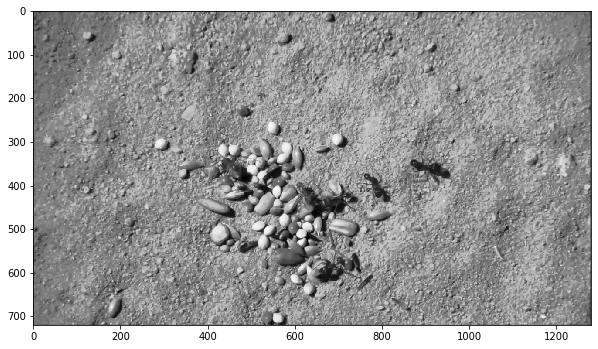

In [46]:
plt.imshow(mov[1], cmap='gray');

In [49]:
def MOG2(frames):
    # this function takes in an array of images from the cv2.VideoCapture() which is either
    # a camera or a video (i.e., mp4) and runs through the images performing background
    # subtraction
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
    fgbg = cv2.createBackgroundSubtractorMOG2()
    fgbg.setDetectShadows(False)
    
    ret = []

    for frame in frames:
        # find the change
        fgmask = fgbg.apply(frame)
        # clean up the image
        fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
        erode = cv2.erode(fgmask, None, iterations=1)
        dilate = cv2.dilate(erode, None, iterations=3)
#         ret.append(dilate)
#         ret.append(fgmask)
        ret.append(erode)
    return ret

masks = MOG2(mov)

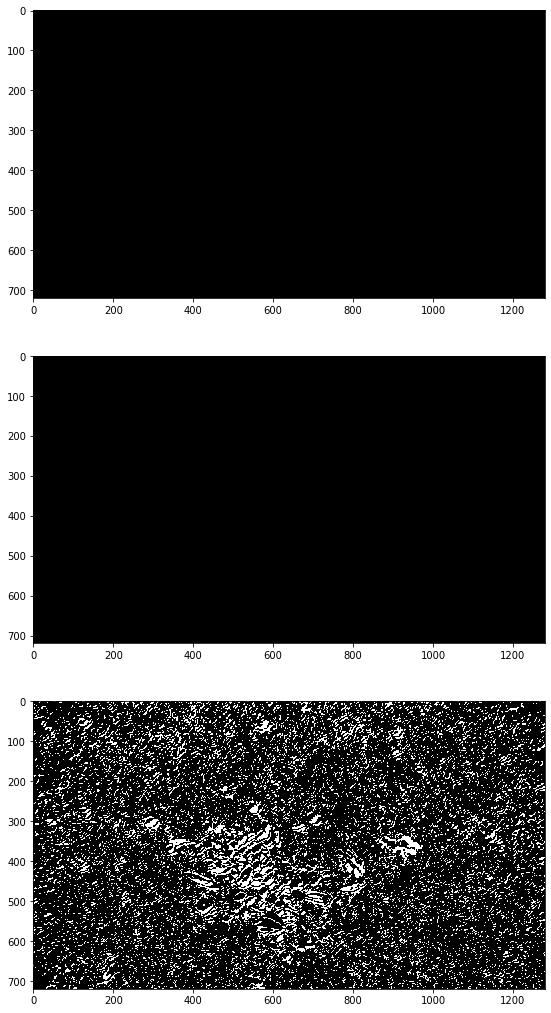

In [50]:
sz = 3
for i in range(sz):
    plt.subplot(sz,1,i+1)
    plt.imshow(masks[i], cmap="gray");

In [ ]:
def maskout(imgs, masks):
    ret = []
    for i,m in zip(imgs, masks):
        m = mask_inv = cv2.bitwise_not(m)